In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage import measure, color

In [109]:
def find_red_anno(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j,0] > 200 and img[i,j,1] < 100 and img[i,j,2] < 100):
                img[i,j] = 255
            else:
                img[i,j] = 0
    return img

In [110]:
def find_blue_anno(img):
    h = img.shape[0]
    w = img.shape[1]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j,0] < 150 and img[i,j,1] < 90 and img[i,j,2] > 200):
                if(((i-h/2)**2 + (j-w/2)**2) < (h/2-50)**2):
                    img[i,j] = 255
                else:
                    img[i,j] = 0
            else:
                img[i,j] = 0
    return img

In [111]:
def find_black_anno(img):
    h = img.shape[0]
    w = img.shape[1]

    for i in range(h):
        for j in range(w):
            if(img[i,j,0] < 20 and img[i,j,1] < 20 and img[i,j,2] < 20):
                if(((i-h/2)**2 + (j-w/2)**2) < (h/2-80)**2):
                    img[i,j] = 255
                else:
                    img[i,j] = 0
            else:
                img[i,j] = 0
    return img

In [112]:
def line2region(img,shape):
    img = img[:,:,0]
    x,y = np.where(img==255)
    cord = []
    for i in range(x.shape[0]):
        cord.append([y[i],x[i]])
    cord = np.array(cord)

    result = np.zeros(shape, np.uint8)
    cv2.fillConvexPoly(result, cord, (255))    
    return result

In [168]:
data_root = os.path.join('data',"内镜图片","病情C")
data_dirs = os.listdir(data_root)
data_dirs.sort()
# for i, data_dir in enumerate(data_dirs):
#     sub_dir = os.path.join(data_root,data_dir)
#     file_names = os.listdir(sub_dir)
#     file_names.sort()

data_dir = data_dirs[18]
sub_dir = os.path.join(data_root,data_dir)
file_names = os.listdir(sub_dir)
file_names.sort()
file_path = os.path.join(sub_dir,file_names[0])
print(file_path)

data/内镜图片/病情C/26/术前10.29.PNG


data/deal/Images/26.png


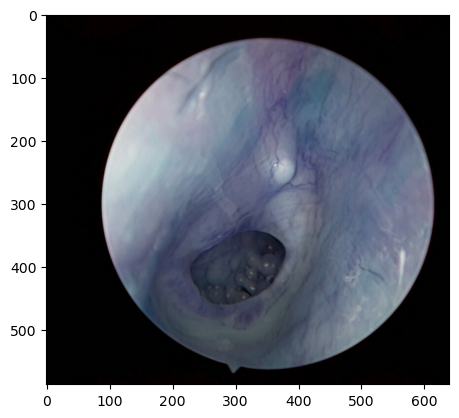

In [169]:
test_img = cv2.imread(file_path)
save_dir = os.path.join('data','deal')
img_dir = os.path.join(save_dir,'Images',data_dir+'.png')
gt_dir = os.path.join(save_dir,'gt',data_dir+'.png')
plt.imshow(test_img)
cv2.imwrite(img_dir,test_img)
print(img_dir)

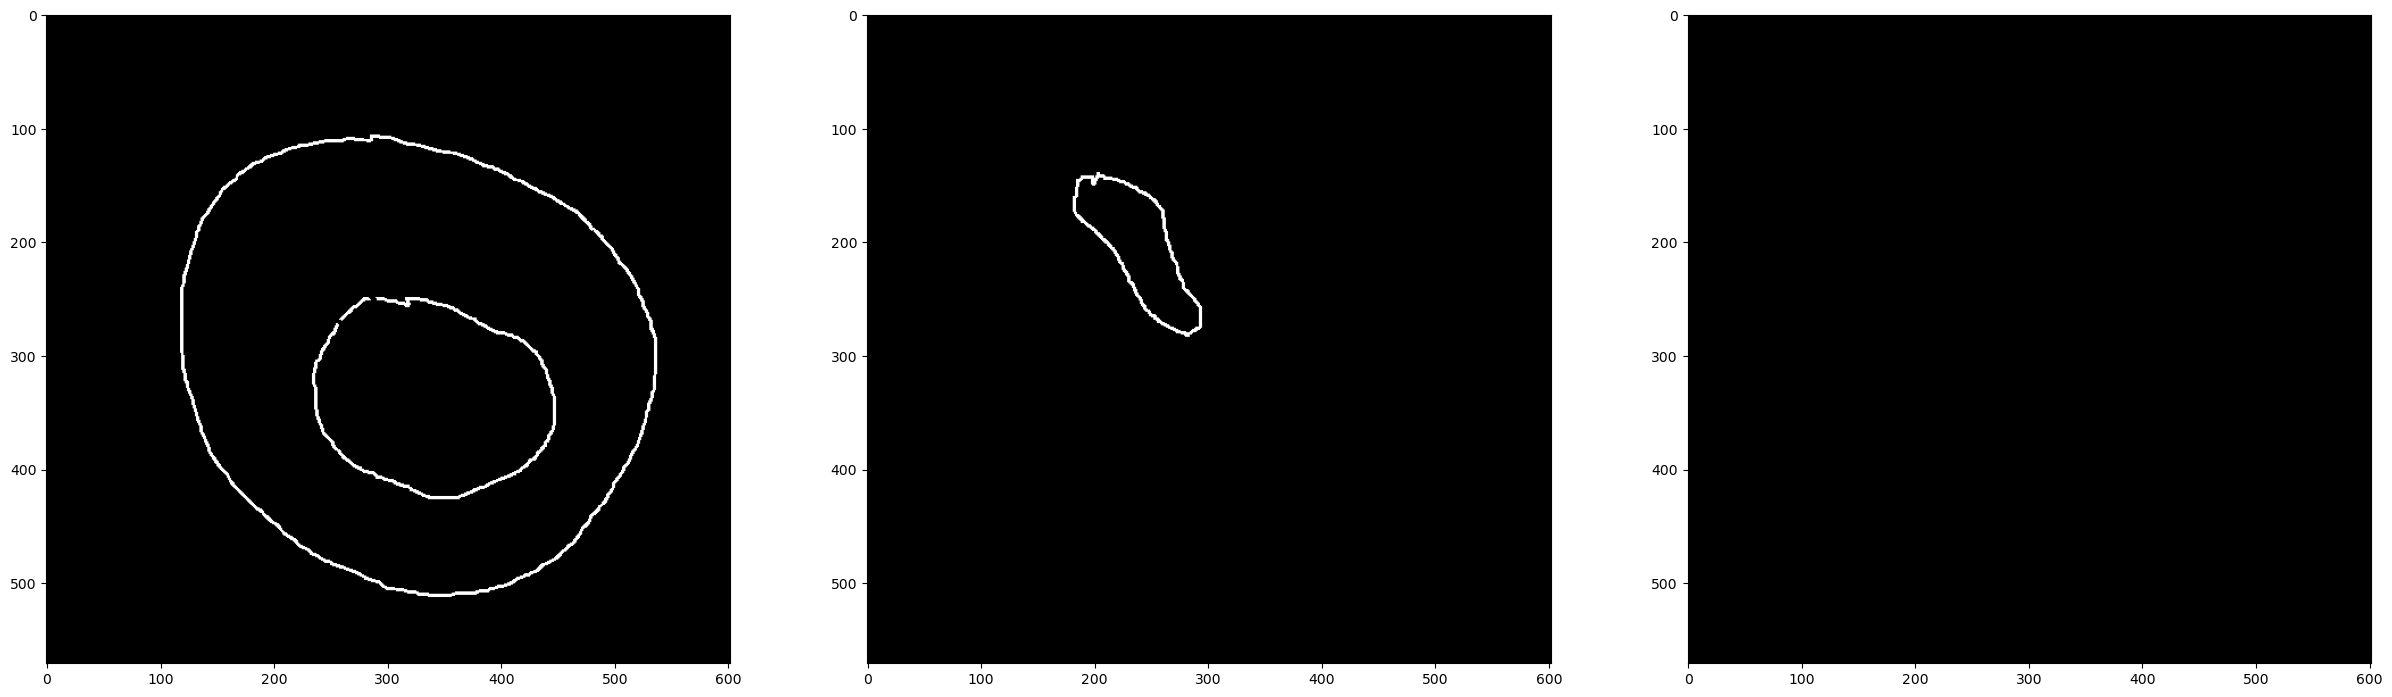

In [115]:
find_red = test_img.copy()
find_red = find_red_anno(find_red)

find_blue = test_img.copy()
find_blue = find_blue_anno(find_blue)

find_black = test_img.copy()
find_black = find_black_anno(find_black)

fig, axes = plt.subplots(1,3, figsize = (30,10))

axes[0].imshow(find_red)
axes[1].imshow(find_blue)
axes[2].imshow(find_black)


In [116]:
red_label = line2region(find_red,test_img.shape[:2])
blue_label = line2region(find_blue,test_img.shape[:2])
black_label = line2region(find_black,test_img.shape[:2])

fig, axes = plt.subplots(1,3, figsize = (30,10))

axes[0].imshow(red_label)
axes[1].imshow(blue_label)
axes[2].imshow(black_label)

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/drawing.cpp:2380: error: (-215:Assertion failed) points.checkVector(2, CV_32S) >= 0 in function 'fillConvexPoly'


True

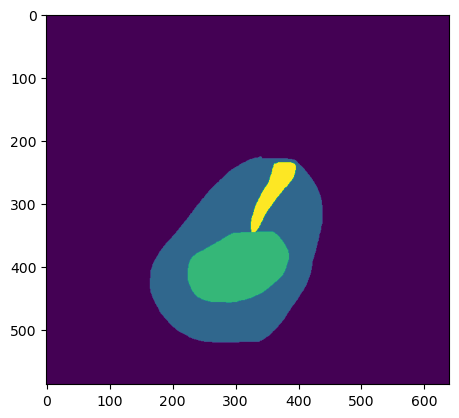

In [ ]:
result = np.zeros(test_img.shape[:2])
result[red_label==255] = 1
result[black_label==255] = 2
result[blue_label==255] = 3
plt.imshow(result)
cv2.imwrite(img_dir,test_img)
cv2.imwrite(gt_dir,result)